In [9]:
import pandas as pd
import math, re
import joblib
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
import itertools


# 데이터 로드

In [10]:
# UserSmellingInput = pd.read_csv('user_smelling_input_dummy_200.csv')
# Perfume = pd.read_csv("perfume.csv")
# PerfumeClassification = pd.read_csv("perfume_classification.csv")
# PerfumeSeason = pd.read_csv("perfume_seasons.csv")
# TopBottom = pd.read_csv("상의_하의.csv")
# Dress = pd.read_csv("원피스.csv")
# ClothesColor = pd.read_csv("clothes_color.csv")
# PerfumeColor = pd.read_csv("perfume_color.csv")

In [11]:
UserSmellingInput = pd.read_csv('../../data/03_results/recommendation/user_smelling_input_dummy_200.csv')
perfume_df = pd.read_csv("../../data/03_results/perfume/perfume.csv")
perfume_classification = pd.read_csv("../../data/03_results/perfume/perfume_classification.csv")
perfume_season = pd.read_csv("../../data/03_results/perfume/perfume_season.csv")
top_bottom = pd.read_csv("../../data/03_results/clothes/상의_하의.csv")
onepiece = pd.read_csv("../../data/03_results/clothes/원피스.csv")
clothes_color = pd.read_csv("../../data/03_results/clothes/clothes_color.csv")
perfume_color = pd.read_csv("../../data/03_results/perfume/perfume_color.csv")

In [12]:
BASE_PATH = "../2_data analysis/clothes/"
model_0 = joblib.load(BASE_PATH + "0_style_model.pkl")
encoder_0 = joblib.load(BASE_PATH + "0_clothes_encoder.pkl")
label_encoder_0 = joblib.load(BASE_PATH + "0_style_label_encoder.pkl")

model_1 = joblib.load(BASE_PATH + "1_style_model.pkl")
encoder_1 = joblib.load(BASE_PATH + "1_clothes_encoder.pkl")
label_encoder_1 = joblib.load(BASE_PATH + "1_style_label_encoder.pkl")


In [13]:
# # models.py 클래스명으로 컬럼명 변경
# rename_map = {
#     "rate_id": "rate_id",
#     "smelling_user_id": "smelling_user_id",

#     "상의_식별자": "top_id",
#     "상의_색상": "top_color",
#     "상의_카테고리": "top_category",
#     "상의_이미지_경로": "top_img",

#     "하의_식별자": "bottom_id",
#     "하의_색상": "bottom_color",
#     "하의_카테고리": "bottom_category",
#     "하의_이미지_경로": "bottom_img",

#     "원피스_식별자": "dress_id",
#     "원피스_색상": "dress_color",
#     "원피스_이미지_경로": "dress_img",

#     "계절": "season",
#     "perfume_id": "perfume_id",
#     "Brand": "brand",
#     "perfume_img_url": "perfume_img_url",
#     "smelling_rate": "smelling_rate",
# }

# UserSmellingInput = UserSmellingInput.rename(columns=rename_map)


In [14]:
# rename_map = {
#     "perfume_id": "perfume_id",
#     "url": "url",
#     "Perfume": "perfume_name",
#     "Brand": "brand",
#     "Country": "country",
#     "Gender": "gender",
#     "RatingValue": "rating_value",
#     "RatingCount": "rating_count",
#     "Year": "year",
#     "Top": "top",
#     "Middle": "middle",
#     "Base": "base",
#     "mainaccord1": "mainaccord1",
#     "mainaccord2": "mainaccord2",
#     "mainaccord3": "mainaccord3",
#     "mainaccord4": "mainaccord4",
#     "mainaccord5": "mainaccord5",
# }
# Perfume = Perfume.rename(columns=rename_map)


In [15]:
# topbottom_map = {
#     "식별자": "id",
#     "스타일": "style",
#     "서브스타일": "sub_style",
#     "상의_색상": "top_color",
#     "상의_카테고리": "top_category",
#     "상의_소매기장": "top_sleeve_length",
#     "상의_소재": "top_material",
#     "상의_프린트": "top_print",
#     "상의_넥라인": "top_neckline",
#     "상의_핏": "top_fit",
#     "하의_기장": "bottom_length",
#     "하의_색상": "bottom_color",
#     "하의_카테고리": "bottom_category",
#     "하의_소재": "bottom_material",
#     "하의_핏": "bottom_fit",
# }
# TopBottom = TopBottom.rename(columns=topbottom_map)


In [16]:
# dress_map = {
#     "식별자": "id",
#     "스타일": "style",
#     "서브스타일": "sub_style",
#     "원피스_기장": "dress_length",
#     "원피스_색상": "dress_color",
#     "원피스_소매기장": "dress_sleeve_length",
#     "원피스_소재": "dress_material",
#     "원피스_프린트": "dress_print",
#     "원피스_넥라인": "dress_neckline",
#     "원피스_핏": "dress_fit",
#     "원피스_디테일": "dress_detail",
# }
# Dress = Dress.rename(columns=dress_map)


In [17]:
# perfume_season_map = {
#     "perfume_id": "perfume",
#     "spring": "spring",
#     "summer": "summer",
#     "fall": "fall",
#     "winter": "winter",
# }
# PerfumeSeason = PerfumeSeason.rename(columns=perfume_season_map)


In [18]:
# perfume_classification_map = {
#     "perfume_id": "perfume",
#     "fragrance": "fragrance",
# }
# PerfumeClassification = PerfumeClassification.rename(columns=perfume_classification_map)


# dummy data 사용자별 향수 myscore 계산

In [19]:
# # 한 유저(동일한 옷, 계절)가 여러 향수에 대해 평가한 것으로 수정
# cols = ['상의_식별자', '상의_색상', '상의_카테고리',
#        '상의_이미지_경로', '하의_식별자', '하의_색상',
#          '하의_카테고리', '하의_이미지_경로', '원피스_식별자',
#        '원피스_색상', '원피스_이미지_경로', '계절',]

# UserSmellingInput[cols] = (
#     UserSmellingInput.groupby("smelling_user_id")[cols]
#       .transform(lambda s: s.iloc[0])
# )

In [25]:
# 사용자별 향수 추천
user_df = UserSmellingInput.drop_duplicates(subset=["smelling_user_id"], keep="first").head(100)
user_df.columns

Index(['rate_id', 'smelling_user_id', '상의_식별자', '상의_색상', '상의_카테고리',
       '상의_이미지_경로', '하의_식별자', '하의_색상', '하의_카테고리', '하의_이미지_경로', '원피스_식별자',
       '원피스_색상', '원피스_이미지_경로', '계절', 'perfume_id', 'Brand', 'perfume_img_url',
       'smelling_rate'],
      dtype='object')

In [27]:
user_df

,rate_id,smelling_user_id,상의_식별자,상의_색상,상의_카테고리,상의_이미지_경로,하의_식별자,하의_색상,하의_카테고리,하의_이미지_경로,원피스_식별자,원피스_색상,원피스_이미지_경로,계절,perfume_id,Brand,perfume_img_url,smelling_rate
0,1,1001,1090632.0,브라운,티셔츠,NaN,1168641.0,블루,청바지,NaN,NaN,NaN,NaN,봄,1310,yves-saint-laurent,NaN,88
13,14,1002,967850.0,화이트,블라우스,NaN,512500.0,핑크,스커트,NaN,NaN,NaN,NaN,여름,124,jo-malone-london,NaN,73
19,20,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2438.0,민트,NaN,가을,259,yves-saint-laurent,NaN,84
31,32,1004,1209067.0,블랙,니트웨어,NaN,1134944.0,실버,팬츠,NaN,NaN,NaN,NaN,봄,122,guerlain,NaN,54
38,39,1005,477321.0,화이트,셔츠,NaN,1010150.0,화이트,스커트,NaN,NaN,NaN,NaN,겨울,902,creed,NaN,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,963,1096,507097.0,레드,브라탑,NaN,981559.0,블랙,팬츠,NaN,NaN,NaN,NaN,여름,758,yves-saint-laurent,NaN,55
972,973,1097,1000982.0,스카이블루,블라우스,NaN,1134946.0,실버,팬츠,NaN,NaN,NaN,NaN,가을,858,yves-saint-laurent,NaN,62
980,981,1098,130662.0,블랙,탑,NaN,1082118.0,블랙,팬츠,NaN,NaN,NaN,NaN,여름,22,calvin-klein,NaN,77
991,992,1099,1080275.0,화이트,티셔츠,NaN,1086968.0,화이트,스커트,NaN,NaN,NaN,NaN,가을,1068,yves-saint-laurent,NaN,77


In [28]:
# =========================================================
# 2. 모든 사용자에 대해 반복
# =========================================================
score_list = []

for idx, user_row in user_df.iterrows():
    user_id = user_row["smelling_user_id"]
    perfume_df_user = perfume_df.copy()
    # # 사용자의 비선호_향조 추출
    # dislike_raw = user_df.loc[
    #     user_df["smelling_user_id"] == user_id, 
    #     "비선호_향조"
    # ].iloc[0]

    # # 리스트로 변경
    # if isinstance(dislike_raw, str):
    #     dislike_accords = [x.strip() for x in dislike_raw.split(",")]
    # elif isinstance(dislike_raw, list):
    #     dislike_accords = dislike_raw
    # else:
    #     dislike_accords = []
    
    # perfume_df_user = perfume_df.copy()
    # # 2) perfume에서 제외 조건 만들기
    # mask_exclude = perfume_df_user[["mainaccord1", "mainaccord2", "mainaccord3"]].isin(
    #     dislike_accords
    # ).any(axis=1)

    # # 3) 비선호 향조가 포함된 향수 제외
    # perfume_df_user = perfume_df_user[~mask_exclude].reset_index(drop=True)

    ## A. 스타일&향조
    # =========================================================
    # 3. 스타일 예측
    # =========================================================
    df_1 = user_df[user_df["smelling_user_id"] == user_id].copy()

    df_1 = df_1.drop(columns=['rate_id','원피스_이미지_경로', '계절', 'perfume_id', 'Brand', 'perfume_img_url',
       'smelling_rate','상의_이미지_경로','하의_이미지_경로'], axis=1)

    def merge_clothes(user_df, clothes_df, clothes_type):
        cols = [
            "식별자",
            f"{clothes_type}_소재",
            f"{clothes_type}_핏",
            f"{clothes_type}_프린트",
            f"{clothes_type}_디테일",
            f"{clothes_type}_넥라인",
            "서브스타일",
        ]
        if clothes_type == "상의":
            cols.append("상의_소매기장")
        elif clothes_type == "원피스":
            cols.append("원피스_소매기장")
            cols.append("원피스_기장")
        else:
            cols.append(f"{clothes_type}_기장")

        cols = [c for c in cols if c in clothes_df.columns]

        user_df = user_df.merge(
            clothes_df[cols],
            left_on=f"{clothes_type}_식별자",
            right_on="식별자",
            how="left",
        ).drop(columns=["식별자"], errors="ignore")

        user_df = user_df.rename(columns={"서브스타일": f"{clothes_type}_서브스타일"})
        return user_df

    df_1 = merge_clothes(df_1, top_bottom, "상의")
    df_1 = merge_clothes(df_1, top_bottom, "하의")
    df_1 = merge_clothes(df_1, onepiece, "원피스")

    df_1["상의_카테고리"] = df_1["상의_카테고리"].replace({"브라탑": "탑"})


    row = df_1.iloc[-1]

    if pd.isna(row["원피스_식별자"]):
        model, encoder, label_encoder = model_0, encoder_0, label_encoder_0
        row["색상_조합"] = f"{row['상의_색상']}_{row['하의_색상']}"
        row["핏_조합"] = f"{row['상의_핏']}_{row['하의_핏']}"
        train_cols = encoder.feature_names_in_
    else:
        model, encoder, label_encoder = model_1, encoder_1, label_encoder_1
        train_cols = encoder.feature_names_in_

    row_df = pd.DataFrame([row[train_cols]])
    train_cols = [col for col in encoder.feature_names_in_ if col in row.index]

    row_df[train_cols] = encoder.transform(row_df[train_cols].astype("object"))

    user_style = label_encoder.inverse_transform([model.predict(row_df)[0]])[0]
    print(f"선택된 사용자: {user_id}, 예측 스타일: {user_style}")

    # =========================================================
    # 4. 스타일 점수
    # =========================================================
    style_fragrance_score = {
        "로맨틱": {
            "플로럴향, 달콤한향": 7,
            "싱그러운 풀 향": 4,
            "머스크같은 중후한향": 2,
            "파우더느낌의 부드러운향": 6,
            "시원하고 신선한 바다 향": 5,
            "감귤류의 상큼한 향": 2,
            "라벤더같은 상쾌한향": 2,
        },
        "섹시": {
            "플로럴향, 달콤한향": 5,
            "싱그러운 풀 향": 6.5,
            "머스크같은 중후한향": 6.5,
            "파우더느낌의 부드러운향": 3,
            "시원하고 신선한 바다 향": 3,
            "감귤류의 상큼한 향": 3,
            "라벤더같은 상쾌한향": 3,
        },
        "소피스트케이티드": {
            "플로럴향, 달콤한향": 6,
            "싱그러운 풀 향": 4,
            "머스크같은 중후한향": 4,
            "파우더느낌의 부드러운향": 7,
            "시원하고 신선한 바다 향": 4,
            "감귤류의 상큼한 향": 1.5,
            "라벤더같은 상쾌한향": 1.5,
        },
        "스포티": {
            "플로럴향, 달콤한향": 5,
            "싱그러운 풀 향": 4,
            "머스크같은 중후한향": 2,
            "파우더느낌의 부드러운향": 3,
            "시원하고 신선한 바다 향": 7,
            "감귤류의 상큼한 향": 5,
            "라벤더같은 상쾌한향": 2,
        },
        "클래식": {
            "플로럴향, 달콤한향": 3.5,
            "싱그러운 풀 향": 4.5,
            "머스크같은 중후한향": 2,
            "파우더느낌의 부드러운향": 6,
            "시원하고 신선한 바다 향": 7,
            "감귤류의 상큼한 향": 2,
            "라벤더같은 상쾌한향": 3.5,
        },
        "젠더리스": {
            "플로럴향, 달콤한향": 5.5,
            "싱그러운 풀 향": 5.5,
            "머스크같은 중후한향": 2,
            "파우더느낌의 부드러운향": 7,
            "시원하고 신선한 바다 향": 4,
            "감귤류의 상큼한 향": 4,
            "라벤더같은 상쾌한향": 2,
        },
        "아방가르드": {
            "플로럴향, 달콤한향": 4,
            "싱그러운 풀 향": 2.5,
            "머스크같은 중후한향": 1,
            "파우더느낌의 부드러운향": 5.5,
            "시원하고 신선한 바다 향": 7,
            "감귤류의 상큼한 향": 5.5,
            "라벤더같은 상쾌한향": 2.5,
        }
    }

    perfume_classification["style_score"] = perfume_classification["fragrance"].apply(
        lambda x: style_fragrance_score.get(user_style, {}).get(x, 0)
    )

    ## B. 색상
    # =========================================================
    # 5. 색상 점수
    # =========================================================
    def parse_rgb(x):
        nums = re.findall(r"\d+", str(x))
        return tuple(map(int, nums[:3]))

    clothes_color["rgb"] = clothes_color["rgb_tuple"].apply(parse_rgb)
    perfume_color["rgb"] = perfume_color["color"].apply(parse_rgb)

    clothes_color_map = dict(zip(clothes_color["color"], clothes_color["rgb"]))
    perfume_color_map = dict(zip(perfume_color["mainaccord"], perfume_color["rgb"]))

    def calc_color_score(c_vec, f_vec):
        dist = math.sqrt(sum((a - b) ** 2 for a, b in zip(c_vec, f_vec)))
        return 100 * (1 - dist / (255 * math.sqrt(3)))

    def mix_fragrance(a1, a2, a3):
        return [a1[i] * 0.6 + a2[i] * 0.3 + a3[i] * 0.1 for i in range(3)]

    if pd.notna(user_row["원피스_색상"]):
        clothes_vec = clothes_color_map[user_row["원피스_색상"]]
    else:
        top = clothes_color_map[user_row["상의_색상"]]
        bottom = clothes_color_map[user_row["하의_색상"]]
        clothes_vec = [top[i] * 0.7 + bottom[i] * 0.3 for i in range(3)]

    perfume_df_user["color_score"] = perfume_df_user.apply(
        lambda r: calc_color_score(
            clothes_vec,
            mix_fragrance(
                perfume_color_map[r["mainaccord1"]],
                perfume_color_map[r["mainaccord2"]],
                perfume_color_map[r["mainaccord3"]],
            ),
        ),
        axis=1,
    )

    ## C. 계절
    # =========================================================
    # 6. 계절 점수
    # =========================================================
    season_map = {"봄": "spring", "여름": "summer", "가을": "fall", "겨울": "winter"}
    user_season = season_map[user_row["계절"]]

    perfume_season["season_score"] = perfume_season[user_season] / (
        perfume_season[["spring", "summer", "fall", "winter"]].sum(axis=1)
    )
    perfume_season["season_score"] = perfume_season["season_score"].fillna(0) * 100

    # 💥 중복 방지를 위해 'season_score' 미리 삭제
    if "season_score" in perfume_df_user.columns:
        perfume_df_user = perfume_df_user.aaaadrop(columns=["season_score"])

    perfume_df_user = perfume_df_user.merge(
        perfume_season[["perfume_id", "season_score"]], on="perfume_id", how="left"
    )

    # 향수별 점수 계산 후, 사용자 ID도 같이 붙이기
    final_df = perfume_df_user[["perfume_id", "color_score", "season_score"]].copy()
    final_df = final_df.merge(
        perfume_classification[["perfume_id", "style_score"]], on="perfume_id", how="left"
    )
    final_df["user_id"] = user_id  # 사용자 ID 직접 넣기

    # =========================================================
    # Scaling + ε Smoothing
    # =========================================================
    from sklearn.preprocessing import MinMaxScaler

    scaler = MinMaxScaler()
    score_cols = ["style_score", "color_score", "season_score"]

    # NaN → 0
    final_df[score_cols] = final_df[score_cols].fillna(0)

    # MinMax Scaling
    final_df[score_cols] = scaler.fit_transform(final_df[score_cols])

    # ================================
    # ε smoothing 적용 (ε = 0.02)
    # ================================
    epsilon = 0.02
    final_df[score_cols] = (final_df[score_cols] + epsilon) / (1 + epsilon)

    # =========================================================
    # 최종 myscore 계산
    # =========================================================
    final_df["myscore"] = (
        final_df["style_score"] +
        final_df["color_score"] +
        final_df["season_score"]
    )

    # 사용자별 결과 append
    score_list.append(final_df)
    final_result = pd.concat(score_list, ignore_index=True)

선택된 사용자: 1001, 예측 스타일: 클래식
선택된 사용자: 1002, 예측 스타일: 로맨틱
선택된 사용자: 1003, 예측 스타일: 클래식
선택된 사용자: 1004, 예측 스타일: 소피스트케이티드
선택된 사용자: 1005, 예측 스타일: 로맨틱
선택된 사용자: 1006, 예측 스타일: 소피스트케이티드
선택된 사용자: 1007, 예측 스타일: 젠더리스
선택된 사용자: 1008, 예측 스타일: 클래식
선택된 사용자: 1009, 예측 스타일: 아방가르드
선택된 사용자: 1010, 예측 스타일: 클래식
선택된 사용자: 1011, 예측 스타일: 로맨틱
선택된 사용자: 1012, 예측 스타일: 로맨틱
선택된 사용자: 1013, 예측 스타일: 로맨틱
선택된 사용자: 1014, 예측 스타일: 클래식
선택된 사용자: 1015, 예측 스타일: 섹시
선택된 사용자: 1016, 예측 스타일: 클래식
선택된 사용자: 1017, 예측 스타일: 젠더리스
선택된 사용자: 1018, 예측 스타일: 젠더리스
선택된 사용자: 1019, 예측 스타일: 젠더리스
선택된 사용자: 1020, 예측 스타일: 로맨틱
선택된 사용자: 1021, 예측 스타일: 젠더리스
선택된 사용자: 1022, 예측 스타일: 젠더리스
선택된 사용자: 1023, 예측 스타일: 로맨틱
선택된 사용자: 1024, 예측 스타일: 젠더리스
선택된 사용자: 1025, 예측 스타일: 로맨틱
선택된 사용자: 1026, 예측 스타일: 소피스트케이티드
선택된 사용자: 1027, 예측 스타일: 로맨틱
선택된 사용자: 1028, 예측 스타일: 로맨틱
선택된 사용자: 1029, 예측 스타일: 젠더리스
선택된 사용자: 1030, 예측 스타일: 로맨틱
선택된 사용자: 1031, 예측 스타일: 젠더리스
선택된 사용자: 1032, 예측 스타일: 젠더리스
선택된 사용자: 1033, 예측 스타일: 클래식
선택된 사용자: 1034, 예측 스타일: 로맨틱
선택된 사용자: 1035, 예측 스타일: 클래식
선택된 사용자: 1036, 예측 스타일: 젠더리스
선

In [ ]:
# final_result.to_csv("../../data/03_results/recommendation/user_smelling_myscore.csv", index=False)

# ε 선택을 위한 히스토그램 비교

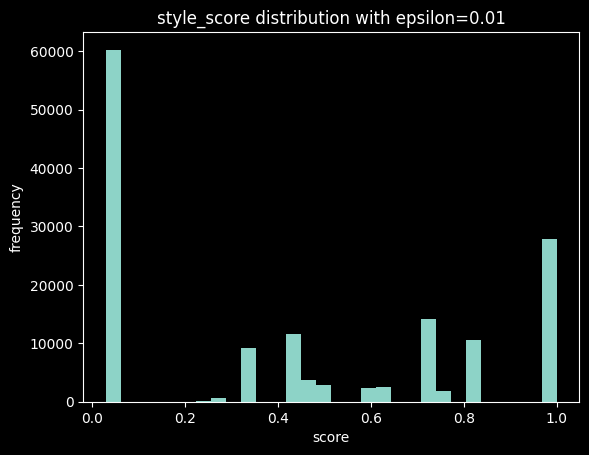

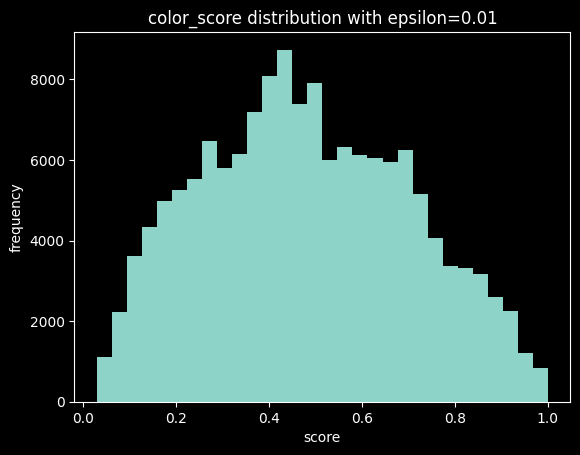

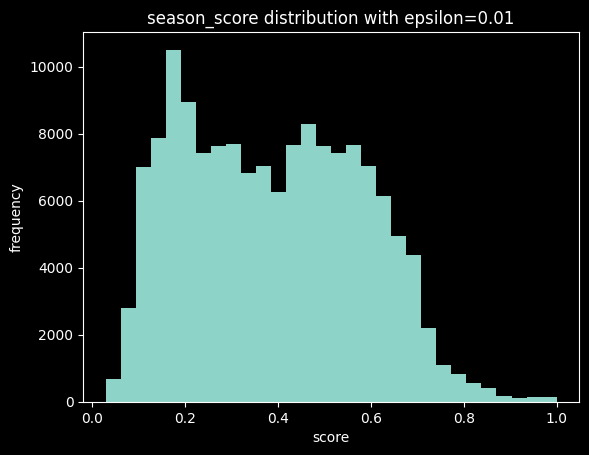

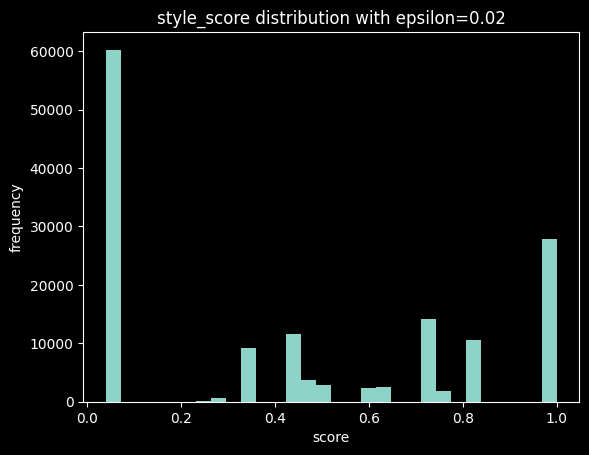

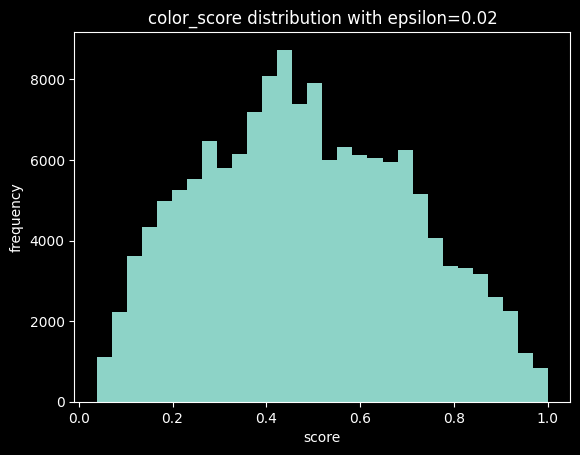

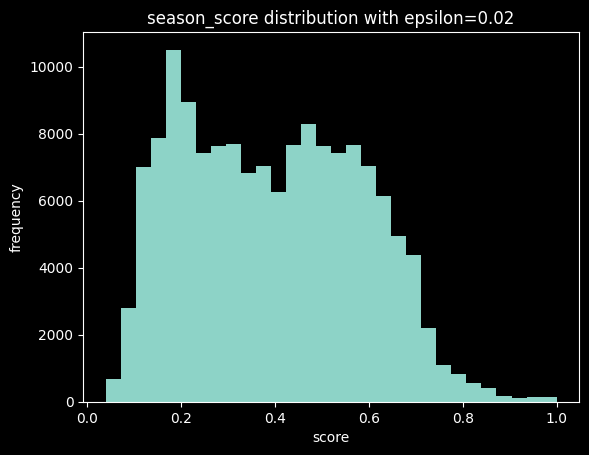

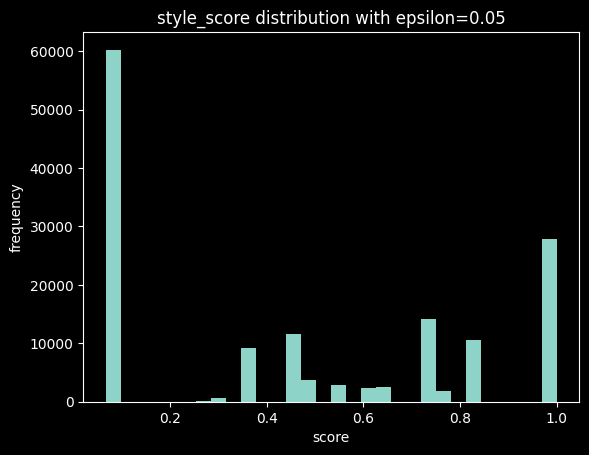

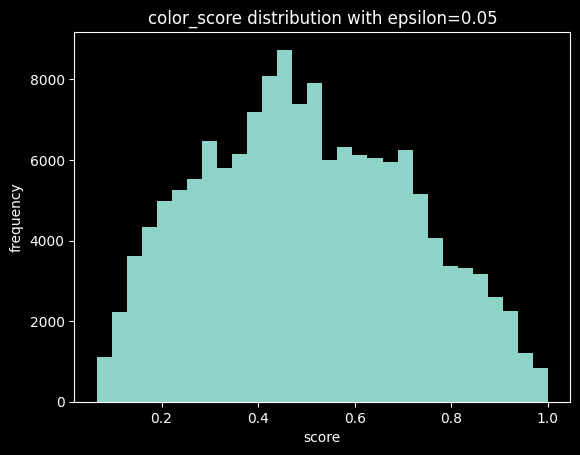

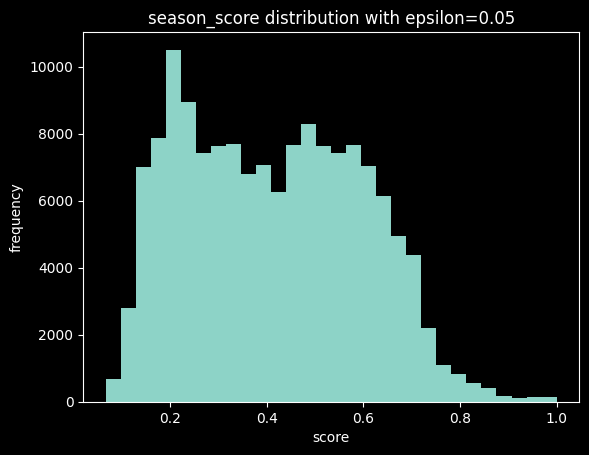

In [31]:
import matplotlib.pyplot as plt

cols = ["style_score", "color_score", "season_score"]
scaled_df = final_result[cols]

# epsilon candidates
epsilons = [0.01, 0.02, 0.05]
# epsilons = [0.0, 0.0, 0.0]

def apply_epsilon(data, eps):
    return (data + eps) / (1 + eps)

for eps in epsilons:
    temp = scaled_df.copy()
    temp = apply_epsilon(temp, eps)

    for c in cols:
        plt.figure()
        plt.hist(temp[c], bins=30)
        plt.title(f"{c} distribution with epsilon={eps}")
        plt.xlabel("score")
        plt.ylabel("frequency")
        plt.show()

# Precision@k

In [32]:
# 예측
final_result.head()

,perfume_id,color_score,season_score,style_score,user_id,myscore
0,0,0.341811,0.413096,0.019608,1001,0.774515
1,1,0.580792,0.389632,0.313725,1001,1.284150
2,2,0.534865,0.431657,0.019608,1001,0.986130
3,3,0.648947,0.187915,0.313725,1001,1.150588
4,4,0.785874,0.540305,0.019608,1001,1.345787


In [33]:
# 실제
UserSmellingInput.head()

,rate_id,smelling_user_id,상의_식별자,상의_색상,상의_카테고리,상의_이미지_경로,하의_식별자,하의_색상,하의_카테고리,하의_이미지_경로,원피스_식별자,원피스_색상,원피스_이미지_경로,계절,perfume_id,Brand,perfume_img_url,smelling_rate
0,1,1001,1090632.0,브라운,티셔츠,NaN,1168641.0,블루,청바지,NaN,NaN,NaN,NaN,봄,1310,yves-saint-laurent,NaN,88
1,2,1001,1090632.0,브라운,티셔츠,NaN,1168641.0,블루,청바지,NaN,NaN,NaN,NaN,봄,617,le-labo,NaN,73
2,3,1001,1090632.0,브라운,티셔츠,NaN,1168641.0,블루,청바지,NaN,NaN,NaN,NaN,봄,478,yves-saint-laurent,NaN,50
3,4,1001,1090632.0,브라운,티셔츠,NaN,1168641.0,블루,청바지,NaN,NaN,NaN,NaN,봄,1452,guerlain,NaN,51
4,5,1001,1090632.0,브라운,티셔츠,NaN,1168641.0,블루,청바지,NaN,NaN,NaN,NaN,봄,767,giorgio-armani,NaN,80


In [34]:
# k 값 리스트
k_values = list(range(1, 11))

# 결과 저장용
detailed_results = []  # user_id별 precision@k
summary_results = []   # k별 평균 precision

for k in k_values:
    # Top-k 추천 생성
    topk_df = final_result.groupby("user_id").apply(
        lambda x: x.nlargest(k, "myscore")
    ).reset_index(drop=True)
    
    # 사용자별 Precision@k 계산
    user_precisions = []
    for uid in topk_df['user_id'].unique():
        recs = topk_df[topk_df['user_id'] == uid]['perfume_id'].tolist() #현재 사용자의 추천 top-k 향수 리스트
        actuals = UserSmellingInput[UserSmellingInput['smelling_user_id'] == uid]['perfume_id'].tolist() #현재 사용자가 실제로 좋아한 향수
        hit_count = len(set(recs) & set(actuals)) #추천과 실제 좋아한 향수 겹치는 개수
        prec = hit_count / k #Precision@k 계산
        user_precisions.append({'user_id': uid, 'k': k, 'precision': prec})
    
    detailed_results.extend(user_precisions)
    
    # k별 평균 Precision
    mean_prec = sum([d['precision'] for d in user_precisions]) / len(user_precisions)
    summary_results.append({'k': k, 'mean_precision': mean_prec})

# 데이터프레임 변환
detailed_df = pd.DataFrame(detailed_results)
summary_df = pd.DataFrame(summary_results)

print("=== User별 Precision@k ===")
print(detailed_df.head())
print("\n=== 평균 Precision@k ===")
print(summary_df)


=== User별 Precision@k ===
   user_id  k  precision
0     1001  1        0.0
1     1002  1        0.0
2     1003  1        0.0
3     1004  1        0.0
4     1005  1        0.0

=== 평균 Precision@k ===
    k  mean_precision
0   1        0.040000
1   2        0.020000
2   3        0.016667
3   4        0.012500
4   5        0.010000
5   6        0.008333
6   7        0.008571
7   8        0.007500
8   9        0.006667
9  10        0.006000


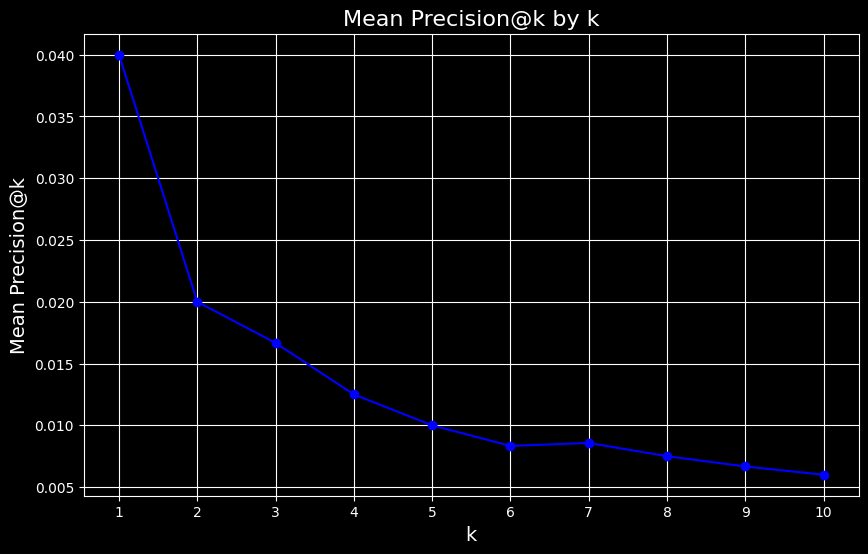

In [35]:
# k 결정
plt.figure(figsize=(10, 6))
plt.plot(summary_df['k'], summary_df['mean_precision'], marker='o', linestyle='-', color='blue')
plt.title("Mean Precision@k by k", fontsize=16)
plt.xlabel("k", fontsize=14)
plt.ylabel("Mean Precision@k", fontsize=14)
plt.xticks(summary_df['k'])
plt.grid(True)
plt.show()


k=6?

# 가중치 조절

In [36]:
# avg precision 높아지도록 가중치 조절

# =========================================================
# 1. 가중치 후보 정의 (예: 0.0~1.0, 합 1)
# =========================================================
weights = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

# k 값
k = 3

# 결과 저장
weight_results = []


# =========================================================
# 2. 모든 가중치 조합 생성 (style, color, season)
# =========================================================
for w_style, w_color, w_season in itertools.product(weights, repeat=3):
    # 합이 1이 아니면 스킵 (선택 사항)
    if w_style + w_color + w_season == 0:
        continue
    
    # 가중치 합이 1로 정규화
    total = w_style + w_color + w_season
    w_style /= total
    w_color /= total
    w_season /= total

    df = final_result.copy()
    df["myscore"] = (
        df["style_score"] * w_style +
        df["color_score"] * w_color +
        df["season_score"] * w_season
    )

    # =========================================================
    # 3. Precision@k 계산
    # =========================================================
    topk_df = df.groupby("user_id").apply(lambda x: x.nlargest(k, "myscore")).reset_index(drop=True)
    precisions = []
    for uid in topk_df['user_id'].unique():
        recs = topk_df[topk_df['user_id'] == uid]['perfume_id'].tolist()
        actuals = UserSmellingInput[UserSmellingInput['smelling_user_id'] == uid]['perfume_id'].tolist()
        hit_count = len(set(recs) & set(actuals))
        precisions.append(hit_count / k)
    
    mean_prec = sum(precisions) / len(precisions)

    # 결과 저장
    weight_results.append({
        "w_style": w_style,
        "w_color": w_color,
        "w_season": w_season,
        "mean_precision": mean_prec
    })

# =========================================================
# 4. 데이터프레임 변환 + 최대 Precision 확인
# =========================================================
weight_df = pd.DataFrame(weight_results)
best_row = weight_df.loc[weight_df['mean_precision'].idxmax()]

print("최적 가중치 조합:")
print(best_row)


최적 가중치 조합:
w_style           0.40
w_color           0.40
w_season          0.20
mean_precision    0.02
Name: 84, dtype: float64
